In [1]:
                                         '''Проект: вариант 1
Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач 
по исследованию нескольких аспектов мобильного приложения:

 1. В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.
 2. Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, 
какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.
 3. Предложите метрики для оценки результатов последнего прошедшего тематического события в игре.'''

'Проект: вариант 1\nПредставьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач \nпо исследованию нескольких аспектов мобильного приложения:\n\n 1. В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.\n 2. Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, \nкакой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.\n 3. Предложите метрики для оценки результатов последнего прошедшего тематического события в игре.'

In [2]:
'''Задание 1
Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, 
которая будет считать retention игроков (по дням от даты регистрации игрока). 
Данные лежат в папке shared и имеют следующую структуру:
shared/problem1-reg_data.csv – данные о времени регистрации
shared/problem1-auth_data.csv – данные о времени захода пользователей в игру

#Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, 
#так и на части (сэмпле) данных.'''

'Задание 1\nRetention – один из самых важных показателей в компании. Ваша задача – написать функцию, \nкоторая будет считать retention игроков (по дням от даты регистрации игрока). \nДанные лежат в папке shared и имеют следующую структуру:\nshared/problem1-reg_data.csv – данные о времени регистрации\nshared/problem1-auth_data.csv – данные о времени захода пользователей в игру\n\n#Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, \n#так и на части (сэмпле) данных.'

In [3]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
#Сделаем преобразование csv файла problem1-reg_data.csv
registration_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-lugnieva/shared/problem1-reg_data.csv'
reg_data = pd.read_csv(registration_file, sep =';')


In [5]:
reg_data

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
999995,1600874034,1110618
999996,1600874086,1110619
999997,1600874139,1110620
999998,1600874191,1110621


In [19]:
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit='s').dt.date

In [21]:
reg_data['reg_ts'].max()

datetime.date(2020, 9, 23)

In [22]:
reg_data['reg_ts'].min()

datetime.date(1998, 11, 18)

In [8]:
reg_data.shape

(1000000, 2)

In [6]:
reg_data.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [9]:
reg_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [7]:
reg_data.uid.value_counts()

2047      1
506274    1
502176    1
414111    1
416158    1
         ..
427642    1
431736    1
454263    1
452214    1
2049      1
Name: uid, Length: 1000000, dtype: int64

In [17]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [11]:
#Сделаем преобразование csv файла problem1-auth_data.csv
activity_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-lugnieva/shared/problem1-auth_data.csv'
auth_data = pd.read_csv(activity_file, sep =';')

In [12]:
auth_data

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2
...,...,...
9601008,1600874034,1110618
9601009,1600874086,1110619
9601010,1600874139,1110620
9601011,1600874191,1110621


In [23]:
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit='s').dt.date

In [24]:
auth_data['auth_ts'].max()

datetime.date(2020, 9, 23)

In [25]:
auth_data['auth_ts'].min()

datetime.date(1998, 11, 18)

In [13]:
auth_data.shape

(9601013, 2)

In [14]:
auth_data.isna().sum()

auth_ts    0
uid        0
dtype: int64

In [15]:
auth_data.dtypes

auth_ts    int64
uid        int64
dtype: object

In [16]:
auth_data.uid.value_counts()

2         1929
108       1397
158       1367
176       1331
191       1296
          ... 
78835        1
119791       1
21471        1
13267        1
8196         1
Name: uid, Length: 1000000, dtype: int64

In [18]:
auth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


In [8]:
'''Retention (удержание) - это метрика, которая измеряет, сколько пользователей возвращается и использует продукт или 
сервис в определенный период времени после их первого взаимодействия с ним. 

Retention бывает двух типов:

1.Retention n-ого дня — количество пользователей, пришедших в определённый день,  
которое вернулось в продукт на n-ый день с момента своего прихода. 

2.Rolling Retention показывает долю пользователей, которые вернулись в день n или в любой день после него. '''

In [9]:
'''Рассчитаем Retention n-ого дня

Чтобы посчитать retention n-го дня, вам нужно выполнить следующие шаги:

 1.Определите когорту пользователей, которая начала использование продукта или сервиса в определенный день (например, первого дня).

 2.Определите количество пользователей из этой когорты, которые также использовали продукт или сервис через n дней после их первого взаимодействия.

 3.Рассчитайте процентное соотношение количества пользователей, возвращенных через n дней, к общему количеству пользователей в когорте.

Формула для расчета retention n-го дня:

Retention rate=Количество пользователей, вернувшихся через n дней/Общее количество пользователей в когорте'''


In [37]:
def retention(auth_path, reg_path, start_date, final_date):
    
    df_auth = pd.read_csv(auth_path, sep=';')
    df_reg = pd.read_csv(reg_path, sep=';') 

    start_date = pd.to_datetime(start_date) 
    final_date = pd.to_datetime(final_date) 

    df_data = df_auth.merge(df_reg, on='uid', how="inner")
    df_data['reg_ts'] = pd.to_datetime(df_data['reg_ts'], unit='s').dt.date
    df_data['auth_ts'] = pd.to_datetime(df_data['auth_ts'], unit='s').dt.date
    
    df_data = df_data.loc[(df_data['reg_ts'] >= start_date)] 
    df_data = df_data.loc[(df_data['auth_ts'] <= final_date)]

    df_data['diff'] = (df_data['auth_ts'] - df_data['reg_ts']).dt.days
    
    
    grouped = df_data.groupby(['diff', 'reg_ts'])['uid'].nunique().reset_index()
    
    cogort_table = grouped.pivot(index='reg_ts', columns='diff', values='uid')
    
    
    df = pd.DataFrame(cogort_table)
    first_column = df[0]
    df_percent = df.div(first_column, axis=0)
    df_percent_filled = df_percent.fillna(0)
    df_without_first_column = df_percent_filled.drop(df_percent_filled.columns[0], axis=1)
    plt.figure(figsize=(20, 12))
    sns.heatmap(df_without_first_column, annot=True, cmap='coolwarm', fmt=".1%")  # fmt=".1%" для отображения в процентах с одним знаком после запятой
    plt.title('Retention')
    plt.xlabel('Retention Days')
    plt.ylabel('Cohorts')
    plt.show()
    
    df_percent_table = round(df_without_first_column * 100, 2)
    print(df_percent_table)

    
    

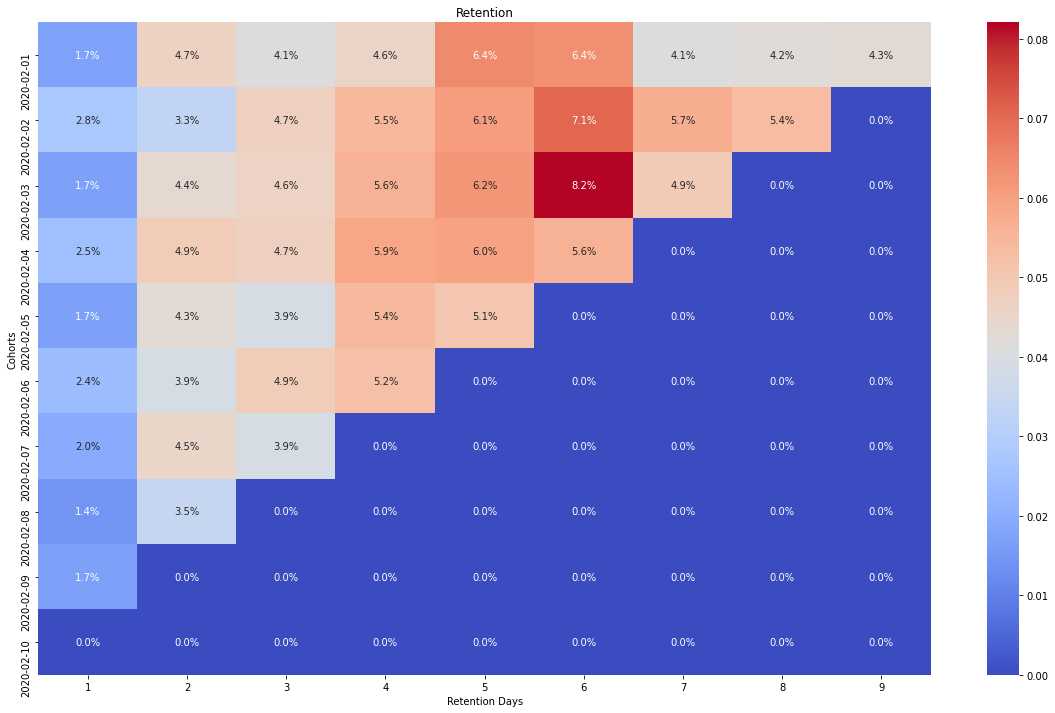

diff           1     2     3     4     5     6     7     8    9
reg_ts                                                         
2020-02-01  1.70  4.66  4.12  4.57  6.45  6.36  4.12  4.21  4.3
2020-02-02  2.77  3.31  4.74  5.45  6.08  7.06  5.72  5.36  0.0
2020-02-03  1.69  4.37  4.64  5.62  6.24  8.21  4.91  0.00  0.0
2020-02-04  2.50  4.90  4.72  5.88  5.97  5.61  0.00  0.00  0.0
2020-02-05  1.69  4.27  3.91  5.42  5.07  0.00  0.00  0.00  0.0
2020-02-06  2.40  3.91  4.88  5.24  0.00  0.00  0.00  0.00  0.0
2020-02-07  1.95  4.52  3.90  0.00  0.00  0.00  0.00  0.00  0.0
2020-02-08  1.42  3.45  0.00  0.00  0.00  0.00  0.00  0.00  0.0
2020-02-09  1.68  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0
2020-02-10  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0


In [38]:
reg_path ='/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-lugnieva/shared/problem1-reg_data.csv'
auth_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-lugnieva/shared/problem1-auth_data.csv'
retention(auth_path, reg_path, '2020-02-01', '2020-02-10')

In [3]:
'''Задание 2
Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. 
Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 
оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? 
Какие метрики стоит проанализировать для принятия правильного решения и как?'''

In [39]:
from scipy.stats import bootstrap
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [40]:
df_all = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-lugnieva/shared/problem2.csv', sep= ";")

In [41]:
df_all

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [42]:
df_all.info

<bound method DataFrame.info of         user_id  revenue testgroup
0             1        0         b
1             2        0         a
2             3        0         a
3             4        0         b
4             5        0         b
...         ...      ...       ...
404765   404766        0         a
404766   404767        0         b
404767   404768      231         a
404768   404769        0         a
404769   404770        0         b

[404770 rows x 3 columns]>

In [43]:
df_all.groupby('testgroup').agg({'revenue': 'count'})  #количество пользователей в каждой группе

,revenue
testgroup,
a,202103
b,202667


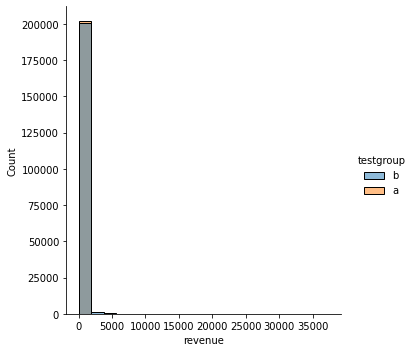

In [44]:
sns.displot(data=df_all, x="revenue", hue="testgroup")

In [45]:
df_all.groupby('testgroup').agg({'revenue': np.mean})  # среднее значение revenue в каждой группе

,revenue
testgroup,
a,25.413720
b,26.751287


In [46]:
df_all.groupby('testgroup').agg({'revenue': np.median})  # медиана значение revenue в каждой группе

,revenue
testgroup,
a,0
b,0


In [47]:
control_df = df_all[df_all.testgroup == 'a'] # df для контрольной группы

In [48]:
control_df

,user_id,revenue,testgroup
1,2,0,a
2,3,0,a
9,10,0,a
10,11,0,a
11,12,0,a
...,...,...,...
404760,404761,0,a
404762,404763,0,a
404765,404766,0,a
404767,404768,231,a


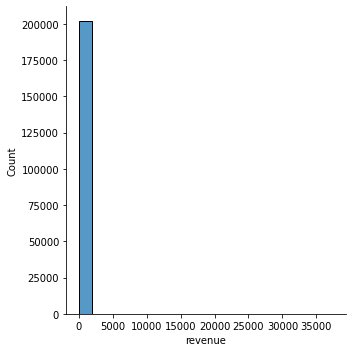

In [49]:
sns.displot(data=control_df, x="revenue")

In [50]:
control_df.revenue.mean()  # среднее для конрольной группы

25.413719736965806

In [51]:
control_pay_df = df_all[(df_all.testgroup == 'a') & (df_all.revenue>0)] # df для контрольной группы где только платящие пользователи

In [52]:
control_pay_df 

,user_id,revenue,testgroup
72,73,351,a
341,342,290,a
385,386,250,a
416,417,37324,a
712,713,255,a
...,...,...,...
404304,404305,360,a
404315,404316,262,a
404543,404544,369,a
404602,404603,251,a


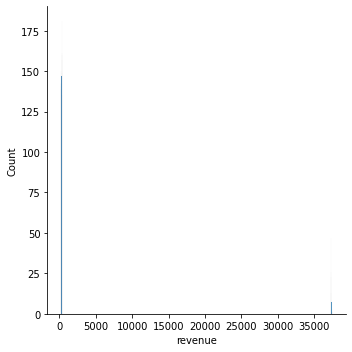

In [53]:
sns.displot(data=control_pay_df, x="revenue")

In [54]:
control_pay_df.revenue.describe()

count     1928.000000
mean      2663.998444
std       9049.039763
min        200.000000
25%        257.000000
50%        311.000000
75%        361.000000
max      37433.000000
Name: revenue, dtype: float64

In [55]:
test_df = df_all[df_all.testgroup == 'b'] # df для тестовой группы

In [56]:
test_df 

,user_id,revenue,testgroup
0,1,0,b
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b
...,...,...,...
404761,404762,0,b
404763,404764,0,b
404764,404765,0,b
404766,404767,0,b


In [57]:
test_pay_df = df_all[(df_all.testgroup == 'b') & (df_all.revenue>0)] # df для тестовой группы где только платящие пользователи

In [58]:
test_pay_df

,user_id,revenue,testgroup
160,161,3797,b
377,378,3768,b
386,387,3527,b
551,552,2038,b
913,914,3902,b
...,...,...,...
403843,403844,3383,b
403994,403995,2793,b
404161,404162,2316,b
404193,404194,2998,b


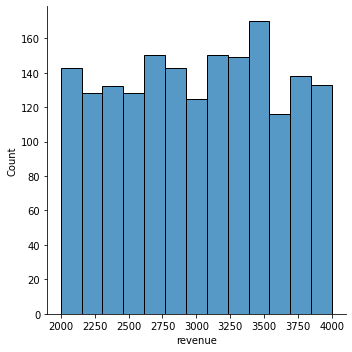

In [59]:
sns.displot(data=test_pay_df, x="revenue")

In [60]:
test_pay_df.revenue.describe()

count    1805.000000
mean     3003.658172
std       572.619709
min      2000.000000
25%      2513.000000
50%      3022.000000
75%      3478.000000
max      4000.000000
Name: revenue, dtype: float64

In [112]:
'''Для принятия правильного решения о том, какой набор предложений лучше, следует проанализировать несколько ключевых метрик. 
 В данном случае, у нас есть данные о выручке (revenue) и группе теста (testgroup), а также информация о том, 
 сколько пользователей стали платящими в каждой группе.

 Рассмотрим три метрики: ARPU (Average Revenue Per User), ARPPU(Average Revenue Per Paying User), конверсию в платящих пользователей (CR - Conversion Rate) 
 между контрольной и тестовой группами. 
 ARPU - это ключевая метрика, которая позволяет оценить среднюю выручку, полученную с каждого пользователя в группе.'''

In [113]:
'''ARPU (Average Revenue Per User) вычисляется как отношение общей выручки к количеству пользователей.
Формула ARPU выглядит следующим образом:

ARPU= Number of Users/Total Revenue
Где:
Total Revenue - общая выручка, полученная от всех пользователей
Number of Users - общее количество пользователей'''

In [61]:
# ARPU контрольной группы
arpu_control = control_df.revenue.sum() / control_df.user_id.count()

In [62]:
arpu_control

25.413719736965806

In [63]:
# ARPU тестовой группы
arpu_test = test_df.revenue.sum() / test_df.user_id.count()

In [64]:
arpu_test

26.75128659327863

In [65]:
(arpu_test - arpu_control) / arpu_control * 100

5.263168360069894

In [ ]:
# ARPU в тестовой группе выше на 5.26%, чем в контрольной

In [66]:
# Посчитаем выручку в обеих группах:
control_sum = control_df.revenue.sum()
test_sum = test_df.revenue.sum()

In [67]:
control_sum

5136189

In [68]:
test_sum

5421603

In [69]:
test_sum-control_sum

285414

In [122]:
#Выручка в тестовой группе больше чем в контрольной на 258414 у.е.

In [123]:
#Используем метод bootstrap для метрики ARPU. 

#Нулевая гипотеза: ARPU тестовой группы не отличается от ARPU контрольной группы.

#Альтернативная гипотеза: ARPU тестовой группы не отличается от ARPU контрольной группы.


In [70]:
means_control = []
for i in range(5000):
    sample_data = control_df.sample(frac=1, replace=True)
    sample_mean = sample_data.revenue.mean()
    means_control.append(sample_mean)

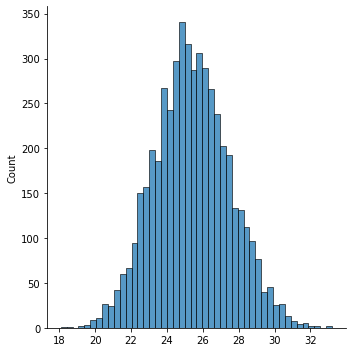

In [71]:
sns.displot(means_control)

In [72]:
pd.Series(means_control).quantile(0.975)

29.671391938763897

In [73]:
pd.Series(means_control).quantile(0.025)

21.45435025704715

In [ ]:
means_control:21.45....29.67

In [75]:
means_test = []
for i in range(5000):
    sample_data = test_df.sample(frac=1, replace=True)
    sample_mean = sample_data.revenue.mean()
    means_test.append(sample_mean)

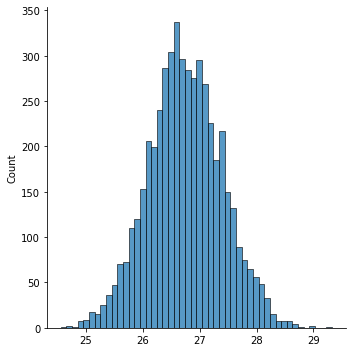

In [76]:
sns.displot(means_test)

In [77]:
pd.Series(means_test).quantile(0.975)

28.02919308520874

In [78]:
pd.Series(means_test).quantile(0.025)

25.49774988034559

In [ ]:
means_test : 25.58...28.00

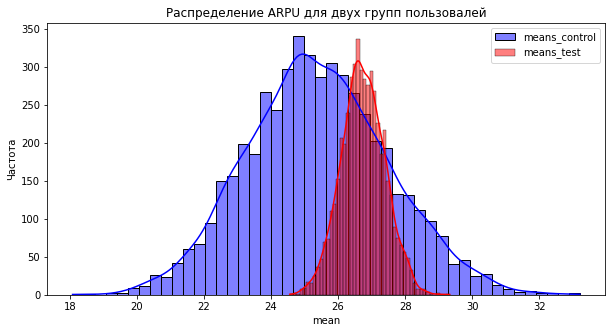

In [79]:
plt.figure(figsize=(10, 5))  # Размер графика
sns.histplot(data=means_control, color='blue', kde=True, label='means_control')  # Первый график
sns.histplot(data=means_test, color='red', kde=True, label='means_test')  # Второй график

# Добавление легенды
plt.legend()

# Настройка осей и заголовка
plt.xlabel('mean')
plt.ylabel('Частота')
plt.title('Распределение ARPU для двух групп пользовалей')

# Отображение графика
plt.show()

In [145]:
'''ARPPU (Average Revenue Per Paying User) - это средняя выручка с одного платящего пользователя. 
 Эта метрика важна, когда рассматривается выручка только от пользователей, совершивших покупку.

 Формула для расчета ARPPU следующая:
 ARPPU= Number of Paying Users/Total Revenue
Где:

Total Revenue - общая выручка, полученная от всех пользователей
Number of Paying Users - количество платящих пользователей'''

In [80]:
# ARPPU контрольной группы
arppu_control = control_df.revenue.sum() / control_df.loc[control_df.revenue > 0].user_id.count()

In [81]:
arppu_control

2663.9984439834025

In [82]:
# ARPPU тестовой группы
arppu_test = test_df.revenue.sum() / test_df.loc[test_df.revenue > 0].user_id.count()

In [83]:
arppu_test

3003.6581717451522

In [85]:
(arppu_test/arppu_control -1)* 100

12.749997227996346

In [ ]:
# ARPPU тестовой группы на 12.75 % выше чем у контрольной группы

In [ ]:
'''Используем метод bootstrap для метрики ARPPU. 

Нулевая гипотеза: ARPPU тестовой группы не отличается от ARPPU контрольной группы.

Альтернативная гипотеза: ARPPU тестовой группы  отличается от ARPPU контрольной группы.'''

In [151]:
means_control_pay = []
for i in range(10000):
    sample_data = control_pay_df.sample(frac=1, replace=True)
    sample_mean = sample_data.revenue.mean()
    means_control_pay.append(sample_mean)

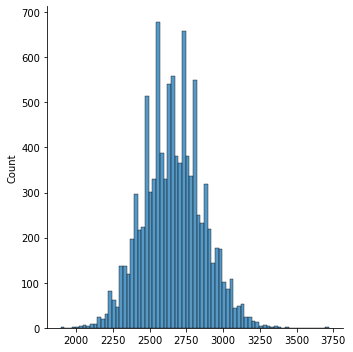

In [152]:
sns.displot(means_control_pay)

In [153]:
pd.Series(means_control_pay).quantile(0.975)

3068.32520746888

In [154]:
pd.Series(means_control_pay).quantile(0.025)

2263.0854642116183

In [155]:
means_test_pay = []
for i in range(10000):
    sample_data = test_pay_df.sample(frac=1, replace=True)
    sample_mean = sample_data.revenue.mean()
    means_test_pay.append(sample_mean)

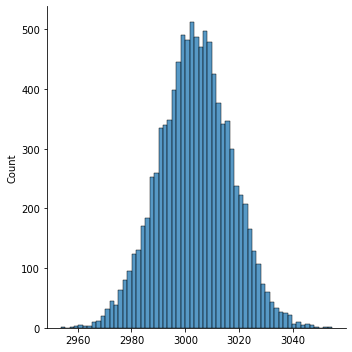

In [156]:
sns.displot(means_test_pay)

In [157]:
pd.Series(means_test_pay).quantile(0.975)

3029.6019529085875

In [158]:
pd.Series(means_test_pay).quantile(0.025)

2977.131592797784

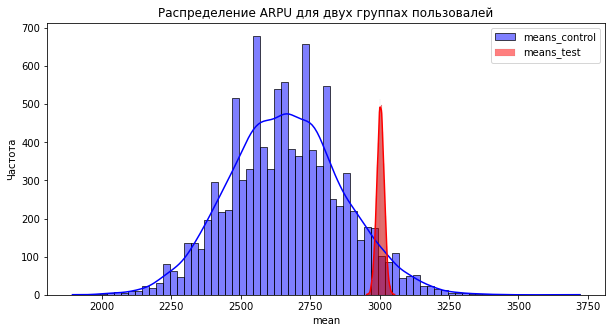

In [159]:
plt.figure(figsize=(10, 5))  # Размер графика
sns.histplot(data=means_control_pay, color='blue', kde=True, label='means_control')  # Первый график
sns.histplot(data=means_test_pay, color='red', kde=True, label='means_test')  # Второй график

# Добавление легенды
plt.legend()

# Настройка осей и заголовка
plt.xlabel('mean')
plt.ylabel('Частота')
plt.title('Распределение ARPU для двух группах пользовалей')

# Отображение графика
plt.show()

In [160]:
'''Conversion Rate (CR), или коэффициент конверсии, измеряет процент пользователей, 
выполнивших желаемое действие относительно общего числа пользователей. 
Это ключевая метрика в маркетинге и аналитике, которая позволяет оценить эффективность определенного действия или кампании.
Формула для расчета Conversion Rate выглядит следующим образом:

CR= (Number of Visitors\Number of Conversions)×100%

Где:
Number of Conversions - количество пользователей, совершивших желаемое действие (например, совершивших покупку).
Number of Visitors - общее количество посетителей или пользователей.'''

In [170]:
cr_control = control_df.loc[control_df.revenue > 0].revenue.count() / control_df.revenue.count()
cr_test = test_df.loc[test_df.revenue > 0].revenue.count() / test_df.revenue.count()

In [173]:
cr_control*100

0.9539690157988748

In [174]:
cr_test*100

0.8906235351586593

In [175]:
'''После этого мы можем применить тест хи-квадрат для определения статистической значимости различий
в конверсии между двумя группами. Тест хи-квадрат позволяет определить, есть ли статистически значимые различия
между наблюдаемыми и ожидаемыми частотами в категориях.'''

In [181]:
df_all['pay'] = df_all['revenue'].apply(lambda x: '1' if x > 0 else '0')
cr_df = df_all.groupby(['testgroup', 'pay'], as_index = False).agg({'user_id':'count'})
cr_df = cr_df.pivot(index = 'pay', columns = 'testgroup', values = 'user_id')

In [182]:
cr_df 

testgroup,a,b
pay,,
0,200175,200862
1,1928,1805


In [187]:
p_value = chi2_contingency(cr_df)[1]

In [188]:
p_value

0.03647561892312613

In [ ]:
0.036 < 0.05

In [ ]:
Какой набор предложений можно считать лучшим?
При анализе метрик ARPU и ARPPU мы видим, что ARPU в тестовой группе выше на 5.26%, чем в контрольной, 
ARPPU тестовой группы на 12.75 % выше чем у контрольной группы.
Конверсия контрольной группы больше чем тестовой  на 0.06
Выручка в тестовой группе больше на 285414 у.е. чем в контрольной.
По двум ключевым метрикам и выручке можно сказать, что набор тестовой группы лучше, 
но для точного анализа этой гипотезы необходимо больше данных, провести повторный эксперимент, выбрать другие группы пользователей, 
так как на этих двух группах виден большой разброс данных.


In [ ]:
''' Задание 3
В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. 
В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. 
Для получения награды требуется пройти ряд уровней за определенное время. 
С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок 
будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?'''

In [ ]:
1. Для оценки результатов последнего прошедшего тематического события 
   в игре Plants & Gardens можно использовать следующие метрики:

Метрики роста:
    
1.1Р Участие игроков: Количество игроков, принявших участие в событии, позволяет оценить его популярность и привлекательность 
    для аудитории.
1.2Р Количество входов в игру: Количество входов в игру является важной метрикой для оценки активности игроков во время 
    проведения тематического события в игре Plants & Gardens. Эта метрика помогает понять, насколько часто игроки 
    возвращаются в игру во время события, и может указать на уровень их заинтересованности и участия.     
1.3Р Количество новых/отвалившихся/вернувшихся пользователей.
1.4Р Stickness ratio — коэффициент того, насколько часто пользователи, в течение одного периода,
    "остаются" в продукте.
1.5Р Конверсия (conversion rate, CR)
    
Метрики продукта:
    
1.1П Прохождение уровней: Количество уровней, пройденных всеми участниками события, может быть ключевым показателем 
    его успешности. 

1.2П Время прохождения уровней: Среднее время, затраченное на прохождение уровней, может помочь определить уровень 
    сложности события. Если среднее время слишком высоко, это может указывать на необходимость балансировки сложности уровней.
    
1.3П Общее количество времени, проведенное игроками во время события, может дать представление о степени их вовлеченности.

1.4П Полученные награды: Количество и типы уникальных предметов, монет или бонусов, полученных игроками в ходе события, 
    могут указать на его успешность в плане мотивации и вознаграждения игроков.

Метрики удовлетворенности    
    
1.1У NPS (net promoter score) : Отзывы и комментарии игроков после завершения события могут предоставить ценную 
    информацию о их удовлетворенности и предложениях по улучшению будущих событий.

1.2У Оценка удовлетворенности клиентов (customer satisfaction score, CSAT) — измеряет общий уровень 
     недовольства пользователя по поводу определенного продукта или функции.
    
2. Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня 
игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

Да, изменится набор метрик оценки результата в случае усложнения механики событий таким образом, 
что при неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. 

Это изменение повлияет на способы оценки успешности события и поведение игроков. 

Вот какие метрики могут стать более важными или измениться:

Метрики продукта:
2.1П Среднее количество попыток на уровень: С учетом возможности отката на несколько уровней назад, игрокам может 
    потребоваться больше попыток для успешного завершения уровня. Это позволит оценить сложность события и адаптацию 
    игроков к новой механике.

2.2П Среднее количество уровней, на которые игрок откатывается: Это позволит оценить влияние новой механики на прогресс 
    игроков и их способность преодолевать сложности.

2.3П Процент завершенных уровней: Учитывая возможность отката на несколько уровней назад, процент завершенных уровней 
    будет важным показателем успеха события.

2.4П Количество завершенных уровней в конечном итоге: Это позволит понять, насколько успешно игроки преодолели 
    новые вызовы события и достигли конечной цели.

2.5П Время прохождения уровня: Возможно, игроки будут тратить больше времени на каждый уровень из-за усложненной механики, 
    поэтому это также может быть важной метрикой.

2.6П Количество неудачных попыток: Новая механика будет стимулировать игроков к более тщательной стратегии 
    прохождения уровней, поэтому количество неудачных попыток станет важным показателем.